In [25]:
import optuna
import Optimization as OP
import FrameworkLib as FL
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx   
from scipy.optimize import minimize

In [26]:
if 0:
# max edge_relation
# s.t. EGVL_RIG > threshold & nodes in box
    N_agents = 4
    max_dist = 7.5
    threshold = 0.5
    box_margin = 10

    sampler = optuna.samplers.NSGAIISampler(constraints_func=OP.Objective.constraints, seed=0)
    study = optuna.create_study(
        directions=["minimize","minimize"],
        sampler=sampler,
        study_name="edge_relation",
        storage="sqlite:///EGVL_RIG.db",
        load_if_exists=True,
    )
    study.optimize(OP.Objective(N_agents,max_dist,threshold,box_margin), n_trials=1000)

In [27]:
# max edge_relation
# s.t. EGVL_RIG > threshold & nodes in box
N_agents = 4
max_dist = 5
threshold = 0.2
box_margin = 10

found = False
while found == False:
    # generate a random graph
    p0 = {i: (random.uniform(0, box_margin), random.uniform(0, box_margin)) for i in range(N_agents)}
    p0_reshaped = np.array([coord for coords in p0.values() for coord in coords])
    # Generate a random graph with num_agents nodes
    G0 = FL.generate_graph(p0, max_dist)
    if FL.is_rigid(G0):
        found = True

# init class
op = OP.Objective(N_agents,max_dist,threshold,box_margin)
op.G = FL.generate_graph(p0, max_dist)
op.p0 = p0_reshaped
op.p = p0_reshaped

# Define the constraints dictionary
constraints = {'type': 'eq', 'fun': op.constraint_function}

# Perform the optimization
result = minimize(op.objective_function, p0_reshaped, constraints=constraints)
# result = minimize(op.objective_function, initial_guess)

# Print the optimization result
print("Optimization Result:")
print(result)
print("\nInitial Condition:")
print("p0:", p0_reshaped)

Optimization Result:
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -13.333333333333332
       x: [ 3.933e+00  9.248e-01  6.619e-01  1.033e+00  5.227e+00
            1.652e+00  3.238e-01  1.007e+00]
     nit: 9
     jac: [ 2.384e-07  5.960e-07  3.576e-07 -1.192e-07  1.192e-07
            3.576e-07  7.153e-07  1.192e-07]
    nfev: 83
    njev: 9

Initial Condition:
p0: [4.04450044 0.10197563 0.28414234 0.30282221 5.17685588 2.24104455
 0.6404866  1.97025165]


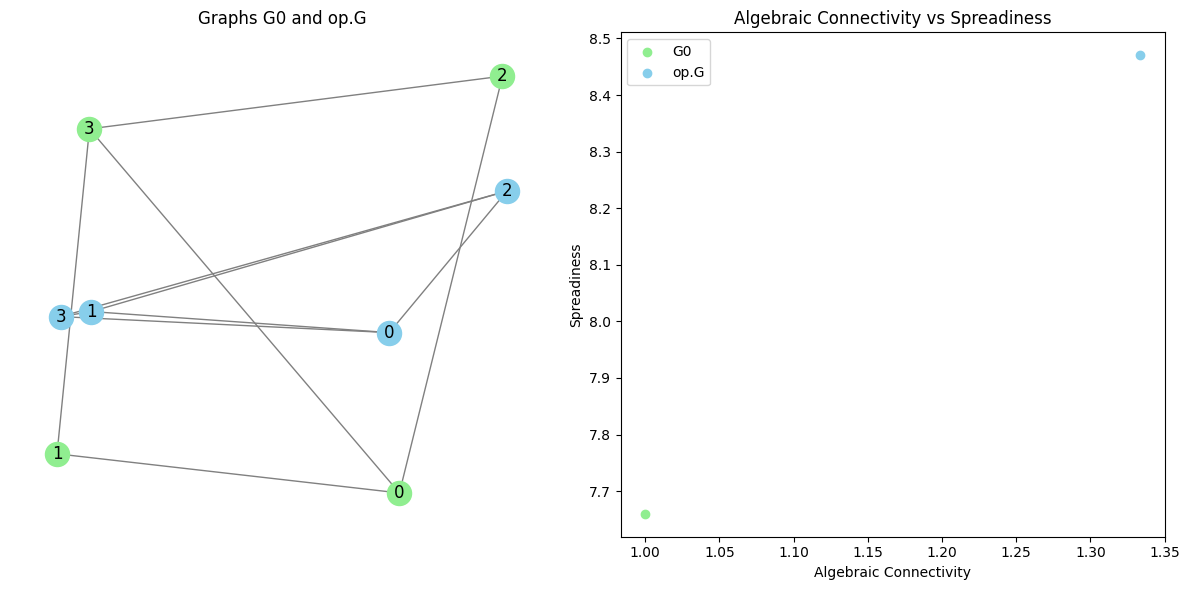

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the two graphs in the first subplot
nx.draw(G0, pos=nx.get_node_attributes(G0, 'pos'), with_labels=True, node_color='lightgreen', edge_color='gray', ax=ax1)
nx.draw(op.G, pos=nx.get_node_attributes(op.G, 'pos'), with_labels=True, node_color='skyblue', edge_color='gray', ax=ax1)
ax1.set_title('Graphs G0 and op.G')

# Plot algebraic connectivity vs spreadiness in the second subplot
ax2.scatter(FL.get_algebraic_connectivity(G0), FL.get_spreadiness(G0), color='lightgreen', label='G0')
ax2.scatter(FL.get_algebraic_connectivity(op.G), FL.get_spreadiness(op.G), color='skyblue', label='op.G')
ax2.set_xlabel('Algebraic Connectivity')
ax2.set_ylabel('Spreadiness')
ax2.legend()
ax2.set_title('Algebraic Connectivity vs Spreadiness')

plt.tight_layout()
plt.show()
